In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Загрузка данных
data = pd.read_csv('parkinsons.data')

In [20]:
# Подготовка данных
X = data.drop(['name', 'status'], axis=1)
y = data['status']

In [21]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Точность модели: {accuracy:.2f}%')

Точность модели: 94.87%


In [26]:
# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

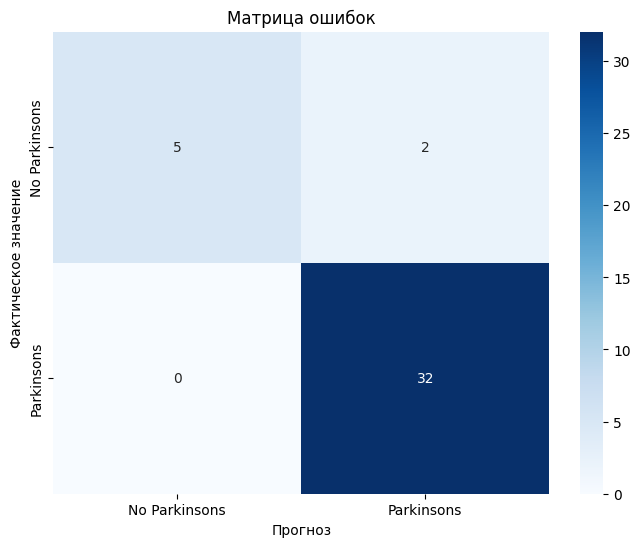

In [27]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Parkinsons', 'Parkinsons'], yticklabels=['No Parkinsons', 'Parkinsons'])
plt.title('Матрица ошибок')
plt.xlabel('Прогноз')
plt.ylabel('Фактическое значение')
plt.show()

На основании матрицы ошибок видно, что модель хорошо справляется с классификацией. Высокий процент правильно классифицированных образцов (32 из 37). Точность: 94.87%